## Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

Missing values in a dataset refer to the absence of data for one or more variables or observations. This can occur for various reasons, such as data entry errors, equipment malfunction, or participants failing to provide information. Missing values can affect statistical analyses, leading to biased or incorrect results. It is essential to handle missing values because many machine learning algorithms fail if the dataset contains missing values2.

However, some algorithms like K-nearest and Naive Bayes support data with missing values

## Q2: List down techniques used to handle missing data. Give an example of each with python code.

Following Techinques are used to handel missing values.
1. Upscalling 
2. Downscalling
3. Mean Imputation Technique 
4. Mode Imputation Technique
5. Median Imputation Technique


### 1. Upscalling :- In this technique We increase the lower data upto the greater data. SMOTE is a one of the known or widely Used Upscallinng Technique

In [3]:
import pandas as pd
import numpy as np 

np.random.seed(123)

total_count=1000
scale_ratio=0.70
class_0=int(scale_ratio*total_count)
class_1=total_count-class_0



n_class_0=pd.DataFrame({
    'F1':np.random.normal(loc=0,scale=1,size=class_0),
    'F2':np.random.normal(loc=0,scale=1,size=class_0),
    'target':[0]*class_0
})
n_class_1=pd.DataFrame({
    'F1':np.random.normal(loc=0,scale=1,size=class_1),
    'F2':np.random.normal(loc=0,scale=1,size=class_1),
    'target':[1]*class_1
})

df=pd.concat([n_class_0,n_class_1]).reset_index(drop=True)
df['target'].value_counts()
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

from sklearn.utils import resample
df_minority_update=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)


upscalled=pd.concat([df_minority_update,df_majority])
upscalled

,F1,F2,target
802,-0.527092,-0.204317,1
970,-1.715901,-1.548765,1
806,-1.451829,0.555489,1
771,0.876326,1.369212,1
888,1.252154,-0.116000,1
...,...,...,...
695,1.074465,2.271034,0
696,1.072630,-0.194144,0
697,-0.823285,-0.201216,0
698,0.805982,0.652305,0


### 1.1 SMOTE :- In this method we are createing points in betwwen 2 existing points

In [22]:
from sklearn.datasets import make_classification

In [23]:
x,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,weights=[0.70],n_clusters_per_class=1,
                        random_state=12)

In [24]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [4]:
final_df.head()

,f1,f2,target
0,-1.267359,0.779033,1
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [5]:
final_df['target'].value_counts()

0    702
1    298
Name: target, dtype: int64

In [6]:
import  matplotlib.pyplot as plt

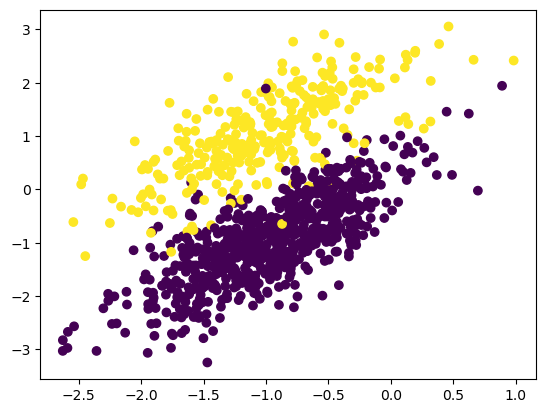

In [7]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [8]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
oversampling=SMOTE()

In [11]:
x,y=oversampling.fit_resample(final_df[['f1','f2']],final_df['target'])

In [12]:
x.shape

(1404, 2)

In [13]:
y.shape

(1404,)

In [14]:
len(y[y==0])

702

In [15]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

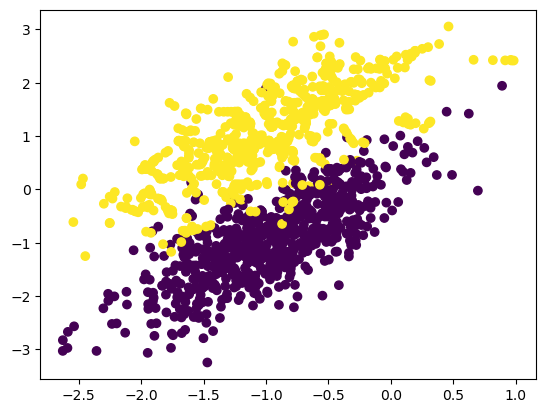

In [16]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

### Downsampling :- In this method we can reduce greater data 

In [1]:
import numpy as np
import pandas as pd
total_count = 1000
scale_ratio=0.90
n_class_0=int(total_count*scale_ratio)
n_class_1=total_count-n_class_0

In [2]:
n_class_0,n_class_1

(900, 100)

In [3]:
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [4]:
final_df=pd.concat([class_0,class_1])

In [5]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [13]:
df_minority=final_df[final_df['target']==1]
df_majority=final_df[final_df['target']==0]

In [14]:
from sklearn.utils import resample

In [15]:
df_majority_update = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=125)

In [16]:
df_majority_update.shape

(100, 3)

In [17]:
downscalling=pd.concat([df_majority_update,df_minority])

In [18]:
downscalling.shape

(200, 3)

In [19]:
downscalling['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

### Mean Imputation Technique

In [1]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df['mean_age']=df['age'].fillna(df['age'].mean())

In [5]:
df[['mean_age','age']]

,mean_age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### Median Imputation Technique

In [6]:
df['median_age']=df['age'].fillna(df['age'].median())

In [7]:
df[['median_age','mean_age','age']]

,median_age,mean_age,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### Mode Imputation Techinque

In [19]:
mode_value=df[df['deck'].notna()]['deck'].mode()[0]

In [20]:
df['mode_deck']=df['deck'].fillna(mode_value)

In [21]:
df[['mode_deck','deck']]

,mode_deck,deck
0,C,NaN
1,C,C
2,C,NaN
3,C,C
4,C,NaN
...,...,...
886,C,NaN
887,B,B
888,C,NaN
889,C,C


## Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Imbalanced data is a dataset where the classes are not evenly distributed. This means that there are a much larger number of instances of one class than the other. This can be a problem for machine learning models, as they can become biased towards the majority class.

For example, let's say we have a dataset of credit card transactions, and we want to build a model to predict whether a transaction is fraudulent. If the dataset is imbalanced, there will be many more instances of non-fraudulent transactions than fraudulent transactions. This means that the model is more likely to predict that a transaction is not fraudulent, even if it is actually fraudulent.

There are a number of techniques that can be used to handle imbalanced data. These include:

Oversampling: This involves creating more instances of the minority class. This can be done by duplicating existing instances or by generating new instances using synthetic data.
Undersampling: This involves removing instances from the majority class. This can be done by randomly deleting instances or by using a technique called SMOTE (Synthetic Minority Oversampling Technique).
Cost-sensitive learning: This involves assigning different costs to misclassifications of different classes. This means that the model will be penalized more for misclassifying instances of the minority class.
If imbalanced data is not handled, the machine learning model is likely to be biased towards the majority class. This can lead to poor performance, especially for tasks where it is important to accurately classify the minority class.

Here are some specific examples of what can happen if imbalanced data is not handled:

A spam filter might not be able to accurately identify spam emails.
A fraud detection system might not be able to accurately identify fraudulent transactions.
A medical diagnosis system might not be able to accurately identify rare diseases.
It is important to handle imbalanced data in order to ensure that machine learning models are accurate and reliable.

## Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

Upsampling and downsampling are two techniques used to manipulate the resolution of images or data. Upsampling increases the resolution of an image by adding new pixels, while downsampling reduces the resolution of an image by removing pixels.

Upsampling is often used to improve the quality of images that have been downsampled. For example, if you have an image that has been resized to fit on a mobile phone screen, upsampling can be used to restore the original resolution of the image.

Downsampling is often used to reduce the size of an image or data set. For example, if you have a large image that you want to store on a mobile device, downsampling can be used to reduce the size of the image without significantly impacting the quality.

Here are some examples of when upsampling and downsampling are required:

Upsampling:
To improve the quality of an image that has been downsampled.
To create a higher resolution image from a lower resolution image.
To increase the size of an image to fit a specific display.
Downsampling:
To reduce the size of an image or data set.
To improve the performance of a machine learning algorithm.
To reduce the amount of storage space required for an image or data set.
Here is an example of how upsampling and downsampling can be used in machine learning:

Let's say you are building a machine learning model to classify images of cats and dogs. You have a dataset of images that is evenly balanced between cats and dogs. However, the images of cats are all very small, while the images of dogs are all very large. This means that the machine learning model is more likely to correctly classify images of dogs than images of cats.

To address this imbalance, you can use upsampling to increase the size of the images of cats. This will make the images of cats more similar in size to the images of dogs, which will help the machine learning model to learn to classify both types of images more accurately.

On the other hand, if you are building a machine learning model to detect fraud in credit card transactions, you may want to use downsampling to reduce the size of your dataset. This is because fraud transactions are very rare, so your dataset may be very large. Downsampling will help you to reduce the size of your dataset without significantly impacting the performance of your machine learning model.

## Q5: What is data Augmentation? Explain SMOTE.

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. This can be done for a variety of reasons, such as to improve the performance of machine learning models, to make the dataset more representative of the real world, or to simply make the dataset more interesting to work with.

There are many different ways to perform data augmentation. Some common techniques include:

Geometric transformations: This involves randomly flipping, rotating, or translating images.
Color space transformations: This involves changing the RGB color channels, intensifying any color, or applying filters.
Noise addition: This involves adding random noise to images or data.
Feature combination: This involves combining different features to create new features.
SMOTE (Synthetic Minority Oversampling Technique) is a specific type of data augmentation that is used to deal with imbalanced datasets. Imbalanced datasets are datasets where there are a much larger number of instances of one class than the other. This can be a problem for machine learning models, as they can become biased towards the majority class.

SMOTE works by creating synthetic instances of the minority class. This is done by randomly selecting a minority class instance and then creating new instances that are located between the selected instance and its k nearest neighbors. The value of k is a parameter that controls the number of synthetic instances that are created.

SMOTE is a very effective technique for dealing with imbalanced datasets. It has been shown to improve the performance of machine learning models on a variety of tasks.

Here are some of the benefits of using data augmentation:

Improved model performance: Data augmentation can help to improve the performance of machine learning models by making the training set more representative of the real world. This is especially important for tasks where the data is imbalanced.
More representative dataset: Data augmentation can help to make the dataset more representative of the real world by adding more variation to the data. This can help to improve the generalization performance of the model.
More interesting dataset: Data augmentation can make the dataset more interesting to work with by adding more variation to the data. This can help to make the data more challenging and engaging to work with.
Here are some of the limitations of using data augmentation:

Increased training time: Data augmentation can increase the training time of machine learning models. This is because the model needs to be trained on a larger dataset.
Overfitting: Data augmentation can lead to overfitting if the model is not properly regularized. This is because the model is being trained on a larger dataset, which can make it more likely to memorize the training data.
Overall, data augmentation is a powerful technique that can be used to improve the performance of machine learning models. However, it is important to be aware of the limitations of data augmentation and to use it in a way that does not lead to overfitting.

## Q6: What are outliers in a dataset? Why is it essential to handle outliers?


Outliers are data points that are significantly different from the rest of the data in a dataset. They can be caused by a variety of factors, such as measurement errors, data entry errors, or genuine anomalies.

Outliers can have a significant impact on the results of statistical analysis. For example, if an outlier is present in a dataset, it can skew the mean and standard deviation of the dataset. This can make it difficult to identify patterns in the data and to make accurate predictions.

It is important to handle outliers in a dataset in order to ensure that the results of statistical analysis are accurate. There are a number of different ways to handle outliers, including:

Identifying and removing outliers: This is the most common approach to handling outliers. Outliers can be identified using a variety of methods, such as the z-score method, the interquartile range (IQR) method, and the Grubbs test. Once outliers have been identified, they can be removed from the dataset.
Imputing outliers: This involves replacing outliers with estimated values. This can be done using a variety of methods, such as the mean imputation method, the median imputation method, and the k-nearest neighbors imputation method.
Modeling outliers: This involves modeling the outliers as a separate group from the rest of the data. This can be done using a variety of methods, such as the mixture model method and the robust regression method.
The best approach to handling outliers will depend on the specific dataset and the statistical analysis that is being performed. However, it is important to handle outliers in order to ensure that the results of statistical analysis are accurate.

Here are some of the reasons why it is essential to handle outliers:

Outliers can skew the results of statistical analysis: Outliers can have a significant impact on the mean and standard deviation of a dataset. This can make it difficult to identify patterns in the data and to make accurate predictions.
Outliers can mislead the analyst: Outliers can be misleading to the analyst, as they can appear to be genuine data points when they are actually errors or anomalies. This can lead to incorrect conclusions being drawn from the data.
Outliers can affect the performance of machine learning models: Outliers can affect the performance of machine learning models, as they can cause the models to learn incorrect patterns in the data. This can lead to the models making inaccurate predictions.
Overall, it is important to handle outliers in a dataset in order to ensure that the results of statistical analysis are accurate and that the models are not misled by the outliers.

## Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

#### Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

## Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?


Here are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data:

Check the distribution of the missing data: If the missing data is missing at random, then the distribution of the missing data should be random. This means that the missing data should be evenly distributed across all values of the variable. However, if there is a pattern to the missing data, then the distribution of the missing data will not be random.
Look for correlations between the missing data and other variables: If the missing data is not missing at random, then there may be a correlation between the missing data and other variables in the dataset. For example, if the missing data is for a variable that is related to income, then there may be a correlation between the missing data and the income of the respondents.
Use statistical tests: There are a number of statistical tests that can be used to determine if the missing data is missing at random. These tests include the Little's MCAR test, the Rubin's Test, and the Allison's Score test.
The best strategy to use will depend on the specific dataset and the analysis that is being performed. However, it is important to determine if the missing data is missing at random or if there is a pattern to the missing data in order to ensure that the results of the analysis are accurate.

Here are some additional considerations when determining if the missing data is missing at random or if there is a pattern to the missing data:

The size of the dataset: The size of the dataset can affect the ability to detect patterns in the missing data. For example, if the dataset is small, then it may be difficult to detect patterns in the missing data.
The type of data: The type of data can also affect the ability to detect patterns in the missing data. For example, it may be easier to detect patterns in missing categorical data than in missing numerical data.
The impact of the missing data: The impact of the missing data on the analysis can also affect the ability to detect patterns in the missing data. For example, if the missing data is not random, then it may be more difficult to detect patterns in the missing data.
Overall, there is no single best strategy to determine if the missing data is missing at random or if there is a pattern to the missing data. The best strategy will depend on the specific dataset and the analysis that is being performed. However, it is important to determine if the missing data is missing at random or if there is a pattern to the missing data in order to ensure that the results of the analysis are accurate.

## Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?


Imbalanced datasets are a common problem in medical diagnosis projects. This is because the majority of patients do not have the condition of interest, while a small percentage do. This can make it difficult to evaluate the performance of a machine learning model on an imbalanced dataset.

Here are some strategies you can use to evaluate the performance of your machine learning model on an imbalanced dataset:

Use different evaluation metrics: There are a number of different evaluation metrics that can be used to evaluate the performance of a machine learning model on an imbalanced dataset. These metrics include accuracy, precision, recall, and F1 score. Accuracy is the most common evaluation metric, but it can be misleading for imbalanced datasets. Precision measures the proportion of positive predictions that are actually positive, while recall measures the proportion of actual positives that are predicted as positive. F1 score is a weighted average of precision and recall.
Use stratified sampling: Stratified sampling is a technique that can be used to create a balanced dataset from an imbalanced dataset. This involves dividing the dataset into strata, or groups, based on the target variable. Then, a random sample is taken from each stratum to create a balanced dataset.
Use cost-sensitive learning: Cost-sensitive learning is a technique that can be used to train a machine learning model to give more weight to the minority class. This involves assigning different costs to misclassifications of different classes. This means that the model will be penalized more for misclassifying instances of the minority class.
Use ensemble learning: Ensemble learning is a technique that can be used to combine the predictions of multiple machine learning models. This can help to improve the performance of the model on an imbalanced dataset.
The best strategy to use will depend on the specific dataset and the analysis that is being performed. However, it is important to use a variety of strategies to evaluate the performance of a machine learning model on an imbalanced dataset in order to ensure that the results are accurate.

Here are some additional considerations when evaluating the performance of a machine learning model on an imbalanced dataset:

The purpose of the model: The purpose of the model can affect the best evaluation metric to use. For example, if the model is being used to make predictions about the majority class, then accuracy may be the most important metric. However, if the model is being used to make predictions about the minority class, then precision or recall may be more important metrics.
The severity of the imbalance: The severity of the imbalance can also affect the best evaluation metric to use. For example, if the imbalance is very severe, then accuracy may not be a good metric to use. In this case, precision or recall may be more appropriate metrics.
The impact of the imbalance: The impact of the imbalance on the analysis can also affect the best evaluation metric to use. For example, if the imbalance is not having a significant impact on the analysis, then accuracy may be a good metric to use. However, if the imbalance is having a significant impact on the analysis, then precision or recall may be more appropriate metrics.
Overall, there is no single best strategy to evaluate the performance of a machine learning model on an imbalanced dataset. The best strategy will depend on the specific dataset and the analysis that is being performed. However, it is important to use a variety of strategies to evaluate the performance of the model in order to ensure that the results are accurate.

## Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

Synthetic minority oversampling technique (SMOTE): This is a technique that generates synthetic instances of the minority class. This is done by randomly selecting an instance from the minority class and then creating new instances that are located between the selected instance and its k nearest neighbors. The value of k is a parameter that controls the number of synthetic instances that are created.

## Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

Random oversampling: This involves randomly duplicating instances from the minority class until the dataset is balanced. This is a simple and effective method, but it can also lead to overfitting.
SMOTE: This is a technique that generates synthetic instances of the minority class. This is done by randomly selecting an instance from the minority class and then creating new instances that are located between the selected instance and its k nearest neighbors. The value of k is a parameter that controls the number of synthetic instances that are created.
Borderline SMOTE: This is a variation of SMOTE that only generates synthetic instances that are located on the decision boundary of the model. This can help to improve the performance of the model on the minority class.
ADASYN: This is a technique that weights the instances in the minority class based on their distance to the decision boundary. This can help to ensure that the synthetic instances are created in areas where the model is most likely to make mistakes.
The best method to use will depend on the specific dataset and the analysis that is being performed. However, it is important to use a method that will balance the dataset without overfitting.

Here are some additional considerations when balancing a dataset and up-sampling the minority class:

The purpose of the model: The purpose of the model can affect the best method to use. For example, if the model is being used to make predictions about the minority class, then random oversampling or SMOTE may be the best methods to use. However, if the model is being used to make predictions about the majority class, then random undersampling may be a better method to use.
The severity of the imbalance: The severity of the imbalance can also affect the best method to use. For example, if the imbalance is very severe, then SMOTE or Borderline SMOTE may be the best methods to use. However, if the imbalance is not very severe, then random oversampling may be a good method to use.
The impact of the imbalance: The impact of the imbalance on the analysis can also affect the best method to use. For example, if the imbalance is not having a significant impact on the analysis, then random oversampling may be a good method to use. However, if the imbalance is having a significant impact on the analysis, then SMOTE or Borderline SMOTE may be better methods to use.
Overall, there is no single best method to balance a dataset and up-sample the minority class. The best method will depend on the specific dataset and the analysis that is being performed. However, it is important to use a method that will balance the dataset without overfitting.